# Fuel Consumption Prediction#


#Overview#

In this project, we are going to build a linear regression model of a dataset of city-cycle fuel consumption in miles per gallon. The dataset consist of both numerical and categorical data. The dataset is available in the folowing link https://archive.ics.uci.edu/dataset/9/auto+mpg.  Our analysis shall consist of the following:

##Data Preparation##

* Constants / Quasi Constants
* Duplicate Rows / Features
* Missing Data
* Outliers
* Train Test Split
* Summary of data preparation


##Exploratory Data Analysis##

* Histograms of relevant features
* graphs
* group by statements
* tables (pivot and/or crosstab)
* Multicollinearity checks (heatmap)
* Correlation with the dependent variable (corrwith)
* Summary of EDA

##Feature Engineering##

* Bi-label Mapping (used with variables that have only 2 unique labels)
* Frequency Encoding (used with variables that have 5 of more unique labels)
* One Hot Encoding (used with variables that have 3 or 4 unique labels)


##Feature Selection##
This will include four techniques that provide feature selection.


###Summary of what we did for feature engineering and feature selection.###

In [ ]:
import pandas as pd

import pandas as pd

# URL of the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"

# Define column names for the dataset
column_names = ["MPG", "Cylinders", "Displacement", "Horsepower", "Weight", "Acceleration", "Model Year", "Origin", "Car Name"]

# Read the dataset into a DataFrame
df = pd.read_csv(url, delim_whitespace=True, names=column_names)

# Rearrange the columns with "Car Name" as the first column
df = df[["Car Name", "Origin", "Model Year", "Acceleration", "Weight", "Horsepower", "Displacement", "Cylinders", "MPG"]]


In [ ]:
# Display the DataFrame with the columns rearranged
pd.set_option('display.max_rows', None)
df.head(396)

,Car Name,Origin,Model Year,Acceleration,Weight,Horsepower,Displacement,Cylinders,MPG
0,chevrolet chevelle malibu,1,70,12.0,3504.0,130.0,307.0,8,18.0
1,buick skylark 320,1,70,11.5,3693.0,165.0,350.0,8,15.0
2,plymouth satellite,1,70,11.0,3436.0,150.0,318.0,8,18.0
3,amc rebel sst,1,70,12.0,3433.0,150.0,304.0,8,16.0
4,ford torino,1,70,10.5,3449.0,140.0,302.0,8,17.0
5,ford galaxie 500,1,70,10.0,4341.0,198.0,429.0,8,15.0
6,chevrolet impala,1,70,9.0,4354.0,220.0,454.0,8,14.0
7,plymouth fury iii,1,70,8.5,4312.0,215.0,440.0,8,14.0
8,pontiac catalina,1,70,10.0,4425.0,225.0,455.0,8,14.0
9,amc ambassador dpl,1,70,8.5,3850.0,190.0,390.0,8,15.0


We see that the dataset contains "?" values which cannot be recognized as NaN by python so we treat this by replacing it with NaN.

In [ ]:
# Replace '?' with NaN
df = df.replace('?', float('nan'))


In [ ]:
# Check the shape
df.shape

(398, 9)

In [ ]:
#check the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Car Name      398 non-null    object 
 1   Origin        398 non-null    int64  
 2   Model Year    398 non-null    int64  
 3   Acceleration  398 non-null    float64
 4   Weight        398 non-null    float64
 5   Horsepower    392 non-null    object 
 6   Displacement  398 non-null    float64
 7   Cylinders     398 non-null    int64  
 8   MPG           398 non-null    float64
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


Some of the data types are not in the right data types so we change them to the right data types.

In [ ]:
# Check to see if the data are in the right data type and apply necessary conversion
df['Horsepower'] = df['Horsepower'].astype('float64')  # Convert to float
df['Cylinders'] = df['Cylinders'].astype('object')     # convert to object
df['Origin'] = df['Origin'].astype('object')     # convert to object
df['Model Year'] = df['Model Year'].astype('object')     # convert to object

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Car Name      398 non-null    object 
 1   Origin        398 non-null    object 
 2   Model Year    398 non-null    object 
 3   Acceleration  398 non-null    float64
 4   Weight        398 non-null    float64
 5   Horsepower    392 non-null    float64
 6   Displacement  398 non-null    float64
 7   Cylinders     398 non-null    object 
 8   MPG           398 non-null    float64
dtypes: float64(5), object(4)
memory usage: 28.1+ KB


In [ ]:
#check for mising vlues
df.isnull().sum()

Car Name        0
Origin          0
Model Year      0
Acceleration    0
Weight          0
Horsepower      6
Displacement    0
Cylinders       0
MPG             0
dtype: int64

1 column with missing data

In [ ]:
# identify constants
constants = [
    val for val in df.columns if len(df[val].fillna(0).unique()) == 1
]

constants


[]

No constants

In [ ]:
# identify quasi constant values (sometimes these may be boolean features)
quasi_consts = []
for val in df.columns.sort_values():
    if (len(df[val].unique()) < 3):
        val_counts = df[val].value_counts(normalize=True)
        print(val_counts)
        if list(val_counts)[0] > .98:
            quasi_consts.append(val)

print('quasi_consts', quasi_consts)

quasi_consts []


No quasi constants

In [ ]:
# identify duplicate rows
df[df.duplicated(keep=False)]

,Car Name,Origin,Model Year,Acceleration,Weight,Horsepower,Displacement,Cylinders,MPG


No dupliate rows

In [ ]:
# check of duplicate columns
duplicate_variables = []
for i in range(0, len(df.columns)):
    orig = df.columns[i]

    for dupe in df.columns[i + 1:]:
        if df[orig].equals(df[dupe]):
            duplicate_variables.append(dupe)
            print(f'{orig} looks the same as {dupe}')

duplicate_variables

[]

No duplicate coluns

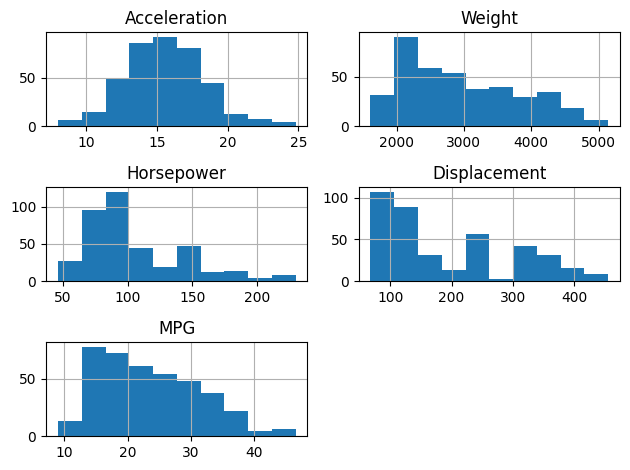

In [ ]:
# plot histograms
import matplotlib.pyplot as plt

df.hist()
plt.tight_layout();

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import skew

# Create a sample DataFrame

# Define a function to replace NaN values with mean or median based on skewness
def replace_nan_with_mean_or_median(column, method='mean'):
    if method == 'mean':
        replacement_value = column.mean()
    elif method == 'median':
        replacement_value = column.median()
    else:
        raise ValueError("Invalid method. Use 'mean' or 'median'.")

    return column.fillna(replacement_value)

# Iterate through columns and replace NaN values based on skewness
for column in df._get_numeric_data().columns:
    col_data = df[column]
    col_skewness = skew(col_data, nan_policy='omit')  # Calculate skewness, omitting NaN values

    if col_skewness > 0:
        # If positively skewed, replace NaN with median
        df[column] = replace_nan_with_mean_or_median(col_data, 'median')
    else:
        # If negatively skewed or approximately symmetric, replace NaN with mean
        df[column] = replace_nan_with_mean_or_median(col_data, 'mean')

#check for NaN values
df.isnull().sum()


Car Name        0
Origin          0
Model Year      0
Acceleration    0
Weight          0
Horsepower      0
Displacement    0
Cylinders       0
MPG             0
dtype: int64

We see that the horsepower column with 6 missing data has bee filled.

In [ ]:
# train test split (target is the dependent (y) variable), print the shapes for X_train and X_test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(df.drop('MPG', axis=1), df['MPG'], test_size=0.20, random_state=42)
print(X_train.shape)
print(X_test.shape)

(318, 8)
(80, 8)


**Important:** We will not be using df (the dataframe we created above) for the remaining code. Instead we will be using X_train for df and X_test when appropriate.

In [ ]:
# describe X_train
pd.set_option('display.max_columns', None)
X_train.describe()


,Acceleration,Weight,Horsepower,Displacement
count,318.000000,318.000000,318.000000,318.000000
mean,15.639937,2969.015723,103.130503,191.904088
std,2.763269,840.617729,37.085324,102.983802
min,8.000000,1613.000000,46.000000,68.000000
25%,13.900000,2220.000000,75.250000,98.500000
50%,15.500000,2822.500000,92.500000,148.500000
75%,17.300000,3597.250000,120.000000,259.500000
max,24.800000,5140.000000,225.000000,455.000000


We carry out feature scaling across the columns using minmax scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

feat_scales = ['Horsepower', 'Weight', 'Acceleration', 'Displacement']

scaler = MinMaxScaler()

for feat in feat_scales:
    X_train[feat] = scaler.fit_transform(X_train[feat].values.reshape(-1,1))

for feat in feat_scales:
    X_test[feat] = scaler.fit_transform(X_test[feat].values.reshape(-1,1))

In [ ]:
# describe X_train again to verify transformations
X_train.describe()

,Acceleration,Weight,Horsepower,Displacement
count,318.000000,318.000000,318.000000,318.000000
mean,0.454758,0.384467,0.319165,0.320166
std,0.164480,0.238338,0.207181,0.266108
min,0.000000,0.000000,0.000000,0.000000
25%,0.351190,0.172101,0.163408,0.078811
50%,0.446429,0.342926,0.259777,0.208010
75%,0.553571,0.562589,0.413408,0.494832
max,1.000000,1.000000,1.000000,1.000000


In [ ]:
# X_train.info()
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318 entries, 3 to 102
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Car Name      318 non-null    object 
 1   Origin        318 non-null    object 
 2   Model Year    318 non-null    object 
 3   Acceleration  318 non-null    float64
 4   Weight        318 non-null    float64
 5   Horsepower    318 non-null    float64
 6   Displacement  318 non-null    float64
 7   Cylinders     318 non-null    object 
dtypes: float64(4), object(4)
memory usage: 22.4+ KB


In [ ]:
# check for outliers
for feat in X_train._get_numeric_data().columns[1:]:
    q1 = X_train[feat].quantile(0.25)
    q3 = X_train[feat].quantile(0.75)
    iqr = q3 - q1
    lower_fence = (q1 - 1.5 * iqr).round()
    upper_fence = (q3 + 1.5 * iqr).round()
    lower_count = X_train[feat][X_train[feat] < lower_fence].count()
    upper_count = X_train[feat][X_train[feat] > upper_fence].count()
    print(f'{feat} outliers = {lower_count + upper_count}: lower_fence: {lower_fence}, upper_fence: {upper_fence}, lower_count: {lower_count}, upper_count: {upper_count}')

Weight outliers = 0: lower_fence: -0.0, upper_fence: 1.0, lower_count: 0, upper_count: 0
Horsepower outliers = 0: lower_fence: -0.0, upper_fence: 1.0, lower_count: 0, upper_count: 0
Displacement outliers = 0: lower_fence: -1.0, upper_fence: 1.0, lower_count: 0, upper_count: 0


In [ ]:
#Dealing with any outlier
import pandas as pd
import numpy as np

def fix_outliers(X_train, z_threshold=3):
    """
    Fix outliers in the numerical columns of a DataFrame using Z-score.

    Parameters:
    - df: DataFrame
        The input DataFrame with mixed data types.
    - z_threshold: float, optional
        The Z-score threshold to identify outliers (default is 3).

    Returns:
    - DataFrame
        A DataFrame with outliers in numerical columns fixed.
    """
    # Separate the numerical and categorical columns
    numeric_columns = X_train.select_dtypes(include=[np.number])
    categorical_columns = X_train.select_dtypes(exclude=[np.number])

    # Define a function to fix outliers in a single numerical column
    def fix_outliers_in_column(column):
        z_scores = np.abs((column - column.mean()) / column.std())
        outlier_mask = z_scores > z_threshold
        column_fixed = column.copy()
        column_fixed[outlier_mask] = column.mean()
        return column_fixed

    # Apply the outlier fixing function to all numerical columns
    numeric_fixed = numeric_columns.apply(fix_outliers_in_column)

    # Combine the fixed numerical columns with the original categorical columns
    X_train_fixed = pd.concat([categorical_columns, numeric_fixed], axis=1)

    return X_train_fixed

# Fix outliers in the DataFrame with the default Z-score threshold
fixed_X_train = fix_outliers(X_train)



### Summary of Data Preparation###

In this data preparation, we first filled the coluns containing "?" with NaN so it can be recognized by python, thereafter we changed some of the data types into their right formats, filled the missing data with their corresponding mean or median values and thereafter split usaed minmax scaler to perform feature scaling. The data was then split into training and test data.

## Exploratory Data Analysis ##

##Plots##

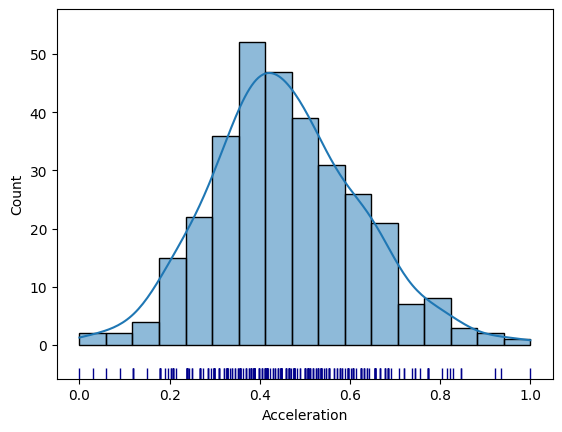

In [ ]:
# Rug Plot
import seaborn as sns
sns.rugplot(x='Acceleration', data=X_train, height=.03, color='darkblue')
sns.histplot(x='Acceleration', data=X_train, kde=True);

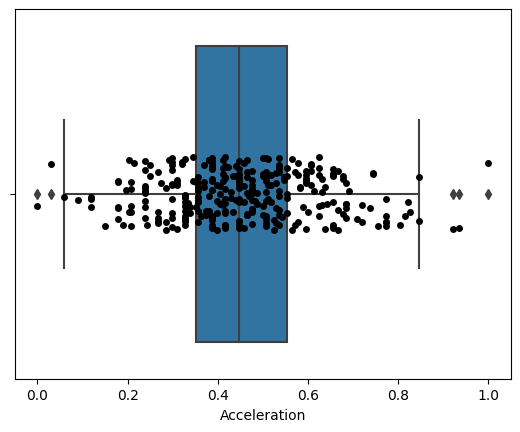

In [ ]:
# Strip Plot
ax = sns.stripplot(x=X_train['Acceleration'], dodge=True, color='black')
sns.boxplot(data=X_train, x='Acceleration', ax=ax);

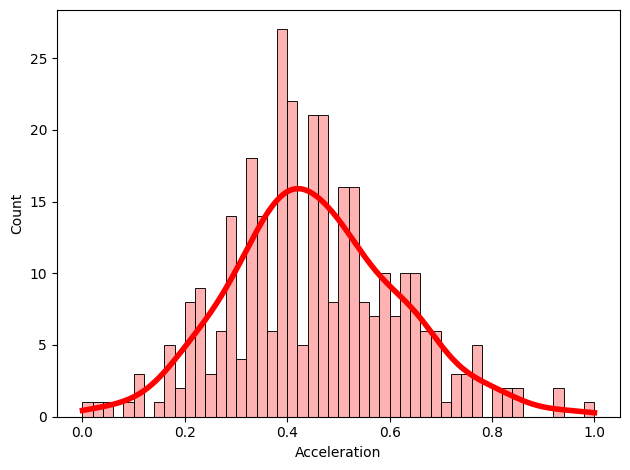

In [ ]:
# Histogram with kernel density estimate
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(X_train['Acceleration'], alpha=0.3, kde=True,
             bins=int(50), color = 'red',
             line_kws={'linewidth': 4})

plt.tight_layout()
plt.show();

##Group By##

In [ ]:
# groupby data views
X_train.groupby(['Cylinders', 'Displacement']).size()

Cylinders  Displacement
3          0.005168         3
           0.031008         1
4          0.000000         1
           0.007752         2
           0.010336         1
           0.020672         1
           0.025840         1
           0.028424         6
           0.033592         1
           0.038760         1
           0.043928         8
           0.046512         2
           0.051680         1
           0.054264         5
           0.056848         6
           0.059432         7
           0.072351         1
           0.074935        18
           0.076227         1
           0.077519        13
           0.082687         1
           0.085271         1
           0.095607         5
           0.100775         4
           0.103359         5
           0.108527         1
           0.111111         1
           0.113695         2
           0.116279         1
           0.118863         1
           0.121447         1
           0.124031         3
           0.131

In [ ]:
# using aggregates
X_train.groupby('Model Year')['Weight'].agg(['min', 'max', 'mean', 'median'])

,min,max,mean,median
Model Year,,,,
70,0.062943,0.884321,0.483155,0.516870
71,0.000000,1.000000,0.410682,0.473207
72,0.145449,0.856252,0.481847,0.583782
73,0.072016,0.959456,0.493373,0.449816
74,0.010207,0.874965,0.361871,0.242983
75,0.158208,0.866175,0.482958,0.441168
76,0.060108,0.784519,0.427806,0.447973
77,0.060108,0.771761,0.372431,0.313864
78,0.053020,0.699461,0.336821,0.335129


In [ ]:
X_train.groupby('Model Year')['Displacement'].agg(['min', 'max', 'mean', 'median'])

,min,max,mean,median
Model Year,,,,
70,0.074935,1.000000,0.540276,0.609819
71,0.007752,0.857881,0.370869,0.423773
72,0.005168,0.932817,0.424249,0.604651
73,0.000000,1.000000,0.463501,0.470284
74,0.007752,0.728682,0.268147,0.136951
75,0.074935,0.857881,0.396248,0.423773
76,0.043928,0.731266,0.342586,0.341085
77,0.028424,0.857881,0.296147,0.139535
78,0.025840,0.645995,0.263066,0.186047


In [ ]:
X_train.groupby('Cylinders')['Acceleration'].agg(['min', 'max', 'mean', 'median'])

,min,max,mean,median
Cylinders,,,,
3,0.267857,0.327381,0.312500,0.327381
4,0.214286,1.000000,0.509847,0.479167
5,0.470238,0.720238,0.632937,0.708333
6,0.196429,0.773810,0.509694,0.505952
8,0.000000,0.845238,0.293550,0.297619


In [ ]:
hi_corr = []

def get_highly_correlated_pairs(df, features, threshold=0.5):
  corr_df = df[features].corr() # get correlations
  correlated_features = np.where(np.abs(corr_df) > threshold) # select ones above the abs threshold
  correlated_features = [(corr_df.iloc[x,y], x, y) for x, y in zip(*correlated_features) if x != y and x < y] # avoid duplication
  s_corr_list = sorted(correlated_features, key=lambda x: -abs(x[0])) # sort by correlation value

  if s_corr_list == []:
    print("There are no highly correlated features with correlation above", threshold)
  else:
    for v, i, j in s_corr_list:
      cols = df[features].columns
      # print ("%s and %s = %.3f" % (corr_df.index[i], corr_df.columns[j], v))
      hi_corr.append([corr_df.index[i], corr_df.index[j]])

get_highly_correlated_pairs(X_train._get_numeric_data(), X_train._get_numeric_data().columns)
hi_corr

[['Weight', 'Displacement'],
 ['Horsepower', 'Displacement'],
 ['Weight', 'Horsepower'],
 ['Acceleration', 'Horsepower'],
 ['Acceleration', 'Displacement']]

We can see that almost all fatures are highly correlated. Since we don't have enough features, we won't delete any yet.

In [ ]:
# # delete one of the features out of the pair(s) that show multicollinearity
# for pairs in hi_corr:
#   # print(pairs[0])
#   X_train.drop(pairs[0], axis=1, inplace=True)
#   X_test.drop(pairs[0], axis=1, inplace=True)

In [ ]:
# vif test
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = X_train._get_numeric_data().dropna().copy()
# add constant
X.insert(0, 'const', 1)

# create dataframe to store vif information
vif = pd.DataFrame()
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# remove constant (first row) and show vif dataframe
X.drop('const', axis=1, inplace=True)
vif = vif.iloc[1: , :]
vif

,Feature,VIF
1,Acceleration,2.468049
2,Weight,9.708880
3,Horsepower,7.983443
4,Displacement,10.039954


In [ ]:
# check info for categorical features
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318 entries, 3 to 102
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Car Name      318 non-null    object 
 1   Origin        318 non-null    object 
 2   Model Year    318 non-null    object 
 3   Acceleration  318 non-null    float64
 4   Weight        318 non-null    float64
 5   Horsepower    318 non-null    float64
 6   Displacement  318 non-null    float64
 7   Cylinders     318 non-null    object 
dtypes: float64(4), object(4)
memory usage: 22.4+ KB


In [ ]:
# Drop the "Car Name" and "Origin" columns as they are not necessary for prediction of MPG
X_train = X_train.drop(["Car Name", "Origin"], axis=1)

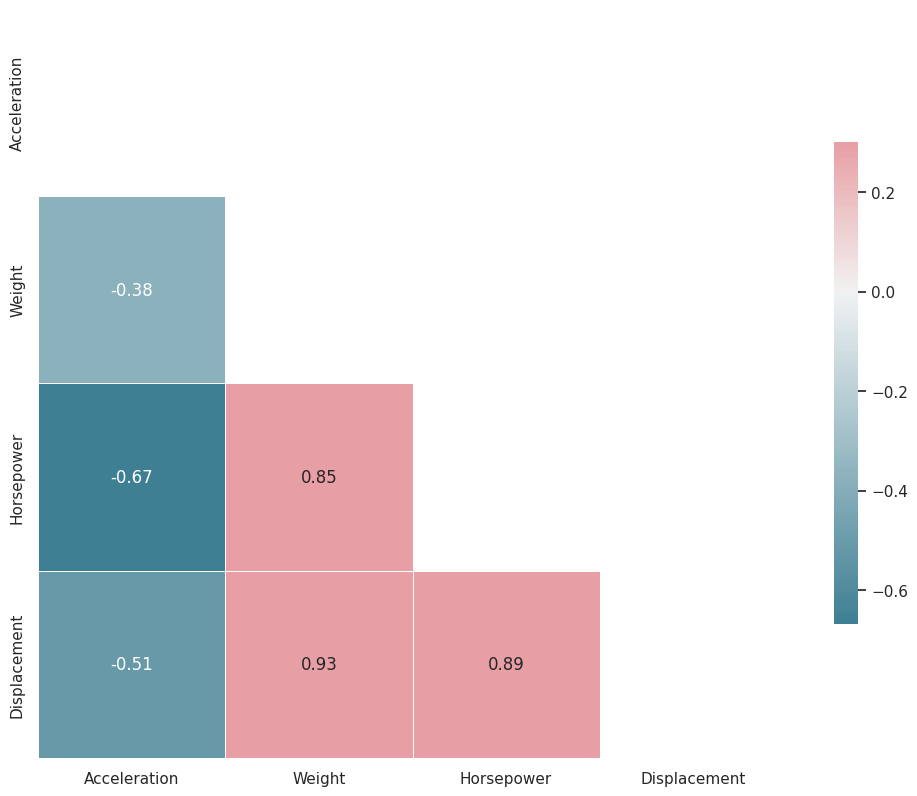

In [ ]:
# show correlation heat map for features, check for multicollinearity
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# correlation matrix
sns.set(style="white")

# compute the correlation matrix
corr = X_train._get_numeric_data().corr()

# generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# set up the matplotlib figure
# f, ax = plt.subplots()
f = plt.figure(figsize=(10, 10))

# generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True);

plt.tight_layout()

In [ ]:
# vif test
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = X_train._get_numeric_data().dropna().copy()
# add constant
X.insert(0, 'const', 1)

# create dataframe to store vif information
vif = pd.DataFrame()
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# remove constant (first row) and show vif dataframe
X.drop('const', axis=1, inplace=True)
vif = vif.iloc[1: , :]
vif

,Feature,VIF
1,Acceleration,2.468049
2,Weight,9.708880
3,Horsepower,7.983443
4,Displacement,10.039954


Because we have only few features to make our predictions, we cannot drop more features.

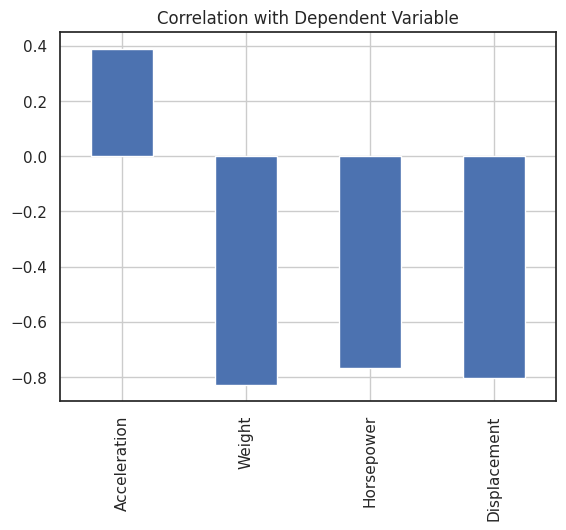

In [ ]:
# correlation with target (corrwith bar chart)
X_train._get_numeric_data().corrwith(y_train).plot.bar(
        title = 'Correlation with Dependent Variable', rot = 90, grid = True);

In [ ]:
# Pivot Table
pd.pivot_table(X_train,
               index=['Cylinders'],
               columns=['Model Year'],
               aggfunc='mean',
               fill_value=0)
# pivot_table = df.pivot_table(index='Cylinders', columns='Model Year', values='MPG', aggfunc='mean')

Acceleration                                                    \
Model Year           70        71        72        73        74        75   
Cylinders                                                                   
3              0.000000  0.000000  0.327381  0.327381  0.000000  0.000000   
4              0.461310  0.509673  0.584077  0.553571  0.508433  0.471939   
5              0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
6              0.446429  0.431548  0.000000  0.471230  0.525794  0.587121   
8              0.191327  0.267857  0.297619  0.263889  0.386905  0.291667   

                                                                        \
Model Year        76        77        78        79        80        81   
Cylinders                                                                
3           0.000000  0.327381  0.000000  0.000000  0.267857  0.000000   
4           0.501374  0.481151  0.488095  0.479978  0.551136  0.509712   
5           0.000000  0.000000  0.470238  0.720238  0.708333  0.000000   
6           0.535714  0.537202  0.523810  0.472619  0.419643  0.471230   
8           0.311012  0.309524  0.281250  0.443878  0.000000  0.654762   

                     Displacement                                          \
Model Year        82           70        71        72        73        74   
Cylinders                                                                   
3           0.000000     0.000000  0.000000  0.005168  0.005168  0.000000   
4           0.497024     0.102067  0.064276  0.105136  0.109561  0.059862   
5           0.000000     0.000000  0.000000  0.000000  0.000000  0.000000   
6           0.535714     0.339363  0.451766  0.000000  0.403531  0.432817   
8           0.000000     0.771133  0.764341  0.721447  0.754005  0.645995   

                                                                        \
Model Year        75        76        77        78        79        80   
Cylinders                                                                
3           0.000000  0.000000  0.031008  0.000000  0.000000  0.005168   
4           0.136582  0.103757  0.091731  0.107720  0.124266  0.111816   
5           0.000000  0.000000  0.000000  0.162791  0.297158  0.136951   
6           0.430350  0.396382  0.374677  0.376744  0.372610  0.332041   
8           0.684755  0.663437  0.696813  0.625323  0.636028  0.000000   

                               Horsepower                                \
Model Year        81        82         70        71        72        73   
Cylinders                                                                 
3           0.000000  0.000000   0.000000  0.000000  0.284916  0.245810   
4           0.107575  0.138961   0.226257  0.188198  0.187849  0.202235   
5           0.000000  0.000000   0.000000  0.000000  0.000000  0.000000   
6           0.304479  0.501292   0.249534  0.283985  0.000000  0.315642   
8           0.728682  0.000000   0.769753  0.651397  0.640223  0.658473   

                                                                        \
Model Year        74        75        76        77        78        79   
Cylinders                                                                
3           0.000000  0.000000  0.000000  0.357542  0.000000  0.000000   
4           0.151304  0.243416  0.181779  0.176909  0.186453  0.171661   
5           0.000000  0.000000  0.000000  0.000000  0.318436  0.173184   
6           0.310987  0.284408  0.294413  0.301676  0.342458  0.318436   
8           0.553073  0.527374  0.557961  0.608007  0.522346  0.472466   

                                            Weight                      \
Model Year        80        81        82        70        71        72   
Cylinders                                                                
3           0.301676  0.000000  0.000000  0.000000  0.000000  0.203289   
4           0.165312  0.161864  0.193513  0.188782  0.111284  0.182379   
5           0.117318  0.000

In [ ]:
#Cross Tab
pd.crosstab(X_train['Cylinders'], X_train['Model Year'])

Model Year,70,71,72,73,74,75,76,77,78,79,80,81,82
Cylinders,,,,,,,,,,,,,
3,0,0,1,1,0,0,0,1,0,0,1,0,0
4,6,8,8,10,12,7,13,12,16,11,22,19,18
5,0,0,0,0,0,0,0,0,1,1,1,0,0
6,3,6,0,6,6,11,10,4,10,5,2,6,1
8,14,5,10,15,4,5,8,6,4,7,0,1,0


##Summary of Exploratory Data Analyss##

In our EDA, we visualized the distribution of our data with several plots, checked for correlation between features and target.

##Feature Engineering##

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318 entries, 3 to 102
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Model Year    318 non-null    object 
 1   Acceleration  318 non-null    float64
 2   Weight        318 non-null    float64
 3   Horsepower    318 non-null    float64
 4   Displacement  318 non-null    float64
 5   Cylinders     318 non-null    object 
dtypes: float64(4), object(2)
memory usage: 17.4+ KB


In [ ]:
# Frequency Encoder
# Let's encode the cylinder column since we have 5 or more unique class of cylinders there

column_to_encode = "Cylinders"

# Calculate the frequency of each unique value in the selected column
frequency_map = df[column_to_encode].value_counts().to_dict()

# Map the frequency values to the column
df[column_to_encode + "_FreqEncoded"] = df[column_to_encode].map(frequency_map)

# Display the DataFrame with the frequency-encoded column
print(df[[column_to_encode, column_to_encode + "_FreqEncoded"]].head())

  Cylinders  Cylinders_FreqEncoded
0         8                    103
1         8                    103
2         8                    103
3         8                    103
4         8                    103


##Feature Selection##

In [ ]:
# Variance Threshold
from sklearn.feature_selection import VarianceThreshold

selections = VarianceThreshold(threshold=0.2)
selections.fit(X_train)
vt_keepers = X_train.columns.values[selections.get_support()]
print(vt_keepers)

['Model Year' 'Cylinders']


In [ ]:
# Recursive Feature Elimination with Cross-Validation (RFECV)
import pandas as pd
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


# Initialize the estimator (regression model)
estimator = LinearRegression()

# Initialize the RFECV
rfecv = RFECV(estimator, cv=5)  # You can adjust the number of cross-validation folds with the 'cv' parameter

# Fit the RFECV to the data
rfecv.fit(X_train, y_train)

# Print the optimal number of features
print("Optimal number of features: %d" % rfecv.n_features_)

# Print the feature rankings
print("Feature rankings: ", rfecv.ranking_)

# Selected features
selected_features = X_train.columns[rfecv.support_]
print("Selected features: ", selected_features)


Optimal number of features: 5
Feature rankings:  [1 1 1 1 1 2]
Selected features:  Index(['Model Year', 'Acceleration', 'Weight', 'Horsepower', 'Displacement'], dtype='object')


In [ ]:
# Select from Model

from sklearn.ensemble import AdaBoostRegressor
from sklearn.feature_selection import SelectFromModel

# Instantiate the estimator (AdaBoostRegressor)
estimator = AdaBoostRegressor()

# Use SelectFromModel with the estimator
selections = SelectFromModel(estimator).fit(X_train, y_train)
mt_keepers = X_train.columns[selections.get_support()]

# Print the selected features
print(mt_keepers)


Index(['Model Year', 'Weight', 'Horsepower'], dtype='object')


##Summary of Feature Engineering and Feature Selection##

In feature engineering, we used the frequency encoder to encode the "Cyliders" feature which contains 5 categorical variables, then we used several feature selection techniques which include RFECV, Variance threshold, and select from model to select the best features for creating our model.

##Creating the Model##

In [ ]:
# statsmodel ols
import statsmodels.api as sm

# features should have a constant or intercept
# X_train = sm.add_constant(X_train)
X_with_const = X_train._get_numeric_data().copy()
X_with_const.insert(0, 'const', 1)
ols_model = sm.OLS(y_train, X_with_const).fit()

print(ols_model.summary())



                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     182.2
Date:                Fri, 27 Oct 2023   Prob (F-statistic):           2.01e-80
Time:                        16:28:13   Log-Likelihood:                -917.99
No. Observations:                 318   AIC:                             1846.
Df Residuals:                     313   BIC:                             1865.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           34.6351      1.440     24.051   

In [ ]:
# create matrices
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# # linalg needs constant that was inserted for OLS and we already have OLS model
# print('Sklearn Linear Regression Model')
# print(lr_df)
# # print(lr_model.intercept_)
# print()
# print('StatsModel')
# print(ols_model.params)
# print()

X = X_with_const
y = y_train
print('Numpy Linear Algebra')
print('weights = ', np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y))

Numpy Linear Algebra
weights =  [ 34.6351318   -0.80112392 -18.33557829  -7.86502768  -3.44499822]


In [ ]:
# create X _get_numeric_data() without constant
X_reg = X_with_const.drop('const', axis=1).copy()
# print(X_reg.columns)
X_reg_test = X_test[X_reg.columns]
print(X_reg_test.columns)

Index(['Acceleration', 'Weight', 'Horsepower', 'Displacement'], dtype='object')


In [ ]:
# lasso model
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X_reg)
y = y_train
lasso_feats = X_reg.columns

lasso = Lasso(alpha=5)
lasso.fit(X, y)

d = {'Feature': lasso_feats, 'Coef': lasso.coef_}
lasso_df = pd.DataFrame(d)
print(lasso_df)


        Feature      Coef
0  Acceleration  0.000000
1        Weight -1.550901
2    Horsepower -0.000000
3  Displacement -0.000000


In [ ]:
# statsmodel ols feature selection per l1 regularization
import statsmodels.api as sm

X_sel_feats = X_reg[['Acceleration', 'Weight', 'Displacement', 'Horsepower']]
X_sel_feats.insert(0, 'const', 1)
ols_model_l1 = sm.OLS(y_train, X_sel_feats).fit()
print(ols_model_l1.summary())

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     182.2
Date:                Fri, 27 Oct 2023   Prob (F-statistic):           2.01e-80
Time:                        16:32:06   Log-Likelihood:                -917.99
No. Observations:                 318   AIC:                             1846.
Df Residuals:                     313   BIC:                             1865.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           34.6351      1.440     24.051   

In [ ]:
#OLS model summary with fewer features according to features from "Select From Model Method" feature selection technique
X_sel_feats = X_reg[['Weight', 'Horsepower']]
X_sel_feats.insert(0, 'const', 1)
ols_model = sm.OLS(y_train, X_sel_feats).fit()
print(ols_model.summary())



                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     364.5
Date:                Fri, 27 Oct 2023   Prob (F-statistic):           1.10e-82
Time:                        16:32:10   Log-Likelihood:                -918.70
No. Observations:                 318   AIC:                             1843.
Df Residuals:                     315   BIC:                             1855.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.4864      0.472     73.053      0.0

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr_model = LinearRegression()
lr_model.fit(X_train._get_numeric_data(), y_train)
# lr_feat_coeffs = list(zip(X_train._get_numeric_data(), lr_model.coef_))
feats = ['const']
feats.extend(X_train._get_numeric_data().columns)
coefs = [lr_model.intercept_]
coefs.extend(lr_model.coef_)
d = {'Feature': feats, 'Coef': coefs}
lr_df = pd.DataFrame(d)
print(lr_df)

# test set prediction results
yhat = lr_model.predict(X_test._get_numeric_data())
print(f'MSE: {mean_squared_error(y_true=y_test, y_pred=yhat)}')
print(f'R-Squared: {r2_score(y_test, yhat)}')
print(f'Training Score: {lr_model.score(X_train._get_numeric_data(), y_train)}')
print(f'Test Score: {lr_model.score(X_test._get_numeric_data(), y_test)}')

        Feature       Coef
0         const  34.635132
1  Acceleration  -0.801124
2        Weight -18.335578
3    Horsepower  -7.865028
4  Displacement  -3.444998
MSE: 16.634371916718138
R-Squared: 0.6906179624960199
Training Score: 0.6996003123339567
Test Score: 0.6906179624960199


Let's try to improve our accuracy by generating 2000 bootstrap samples

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.utils import resample
from scipy import stats


# Set the number of bootstrap samples
num_samples = 2000

# Initialize arrays to store model performance metrics
mse_list = []
train_score_list = []
test_score_list = []


# Set random seed for reproducibility
random_seed = 42

for _ in range(num_samples):
    # Bootstrap resampling
    X_sample, y_sample = resample(X_train._get_numeric_data(), y_train, random_state=random_seed)

    # Create and fit a Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate MSE and R-squared (training and testing scores)
    mse = mean_squared_error(y_test, y_pred)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    # Append metrics to the lists
    mse_list.append(mse)
    train_score_list.append(train_score)
    test_score_list.append(test_score)


# Calculate 95% confidence interval for MSE
confidence_interval = stats.t.interval(0.95, len(mse_list) - 1, loc=np.mean(mse_list), scale=stats.sem(mse_list))

# Print results
print("Mean MSE:", np.mean(mse_list))
print("Mean Training Score (R-squared):", np.mean(train_score_list))
print("Mean Testing Score (R-squared):", np.mean(test_score_list))
print("95% Confidence Interval for MSE:", confidence_interval)


Mean MSE: 20.614758107017362
Mean Training Score (R-squared): 0.7166241497825627
Mean Testing Score (R-squared): 0.701724518315004
95% Confidence Interval for MSE: (20.614758107017362, 20.614758107017362)


Not much difference between the bootstrap and the non-bootstrap results

##Summary and Recommendation##

In this Analysis, we carried out a linear regression model to predict the miles per gallon MPG from a dataset. After all cleaning, exploratory data analysis, feature engineering , feature selection, and fitting the model, we got an accuracy of 69 percent.We assumed this low accuracy and high MSE were ue to the fact that we do not have sufficient instances. We attempted to use bootstrappig to generate more trainig data so our model can learn more and give a better performance, However our accuracy increased by just 2% (69% to 71%) on the average with just 20% confidence. Generally we can say thaat our model performed poorly.

Recommendation: It is recommended we have a larger dataset with more instances for better accuracy.